# Null Models

In this workbook, we will look at a network of US airports and determine if its characteristics are significantly different from random networks.

In [26]:
# Importing the required libraries

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [27]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [28]:
# Function Defintions

# Function to plot a degree distribution graph (P(k) vs k graph)
def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [29]:
# Read in the airport network

G = nx.read_weighted_edgelist("USairport500.txt")
print(G.number_of_nodes())
print(G.number_of_edges())

500
2980


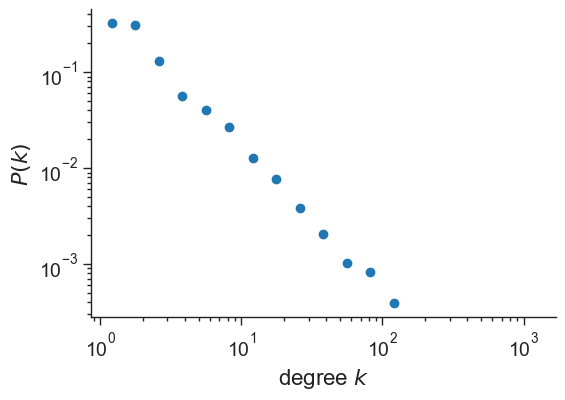

In [41]:
# Let's plot the degree distribution

plot_degree_dist(G)

In [31]:
# ...and calculate the clustering coefficient and average path length

C = np.mean(list(nx.clustering(G).values()))
d = nx.average_shortest_path_length(G,weight=None)

print("Average Clustering Coefficient: ", C)
print("Average Shortest Path: ", d)

Average Clustering Coefficient:  0.6174892374001623
Average Shortest Path:  2.9910300601202406


## Comparing to an Erdös-Renyi graph of similar size

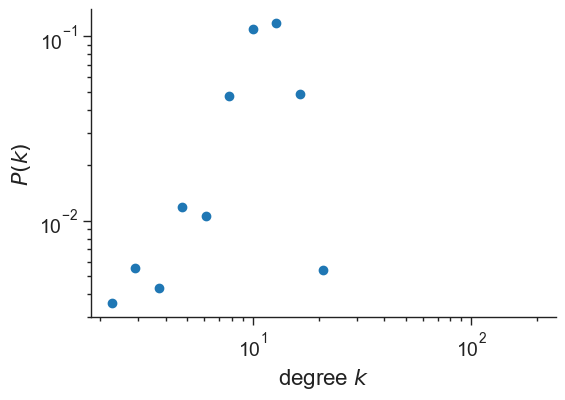

In [32]:
GN = len(G.nodes())
max_L = GN*(GN-1)/2
actual_L = len(G.edges())
p = actual_L/max_L

ER = nx.erdos_renyi_graph(GN, p, directed=False)

plot_degree_dist(ER)

In [33]:
# This is just one instance of a random graph. We need to create an ensemble.

clustering_ER = []
short_path_ER = []

for i in range(100): # 1000 is better
    
    ER = nx.erdos_renyi_graph(GN, p, directed=False)
    C_ER = np.mean(list(nx.clustering(ER).values())) #c coef
    if nx.is_connected(ER)==True:
        d_ER = nx.average_shortest_path_length(ER,weight=None) #average shortest path
    clustering_ER.append(C_ER)
    short_path_ER.append(d_ER)
    
print(np.mean(clustering_ER))
print(np.std(clustering_ER))

print(np.mean(short_path_ER))
print(np.std(short_path_ER))

0.023695139476424723
0.0016105193345165346
2.7660075350701407
0.012058823903033073


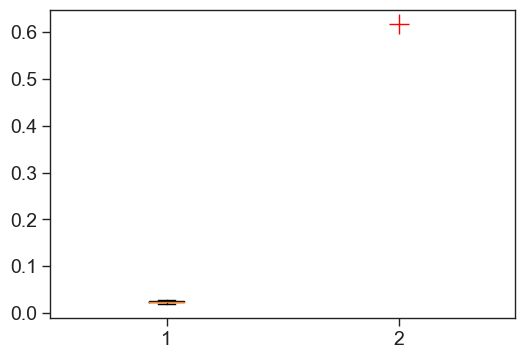

In [34]:
fig = plt.figure(figsize=(6,4))

plt.boxplot(clustering_ER)
plt.plot(2,C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=[1,2])
plt.xlim([0.5,2.5])
plt.show()

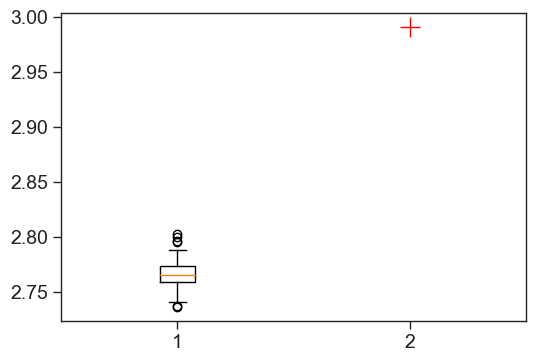

In [35]:
fig = plt.figure(figsize=(6,4))

plt.boxplot(short_path_ER)
plt.plot(2,d,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=[1,2])
plt.xlim([0.5,2.5])
plt.show()

## Is an ER network a fair comparison?

Many network metrics are highly sensitive to the degree distribution - which can be very different in an ER network. Let's look at a degree-preserving randomisation: double edge swaps.

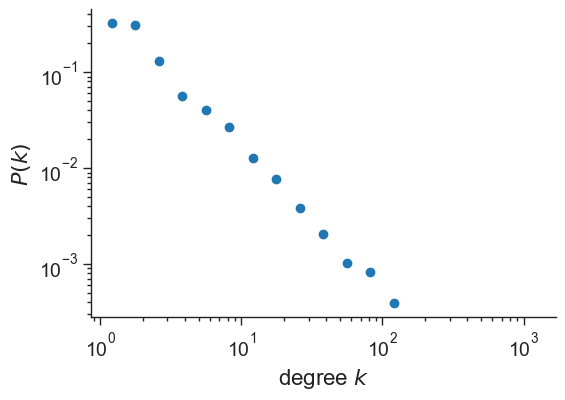

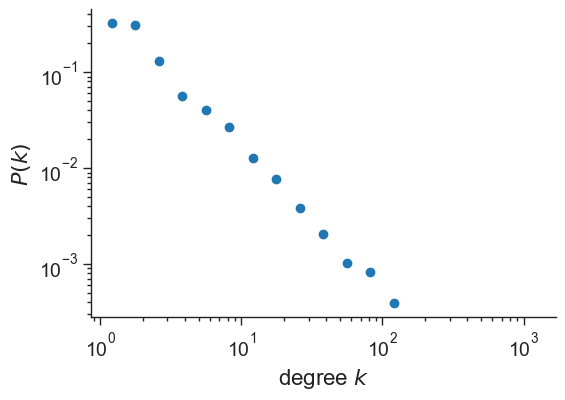

In [36]:
# Calculating metrics for a Degree Preservation Graph

DP = G.copy() # the function edits the graph in place

nx.double_edge_swap(DP,nswap=10*G.number_of_edges(),max_tries=100000)
plot_degree_dist(DP)
plot_degree_dist(G)

In [37]:
10*G.number_of_edges()

29800

In [38]:
# Let's create the ensemble.

clustering_DP = []
short_path_DP = []

for i in range(100): # 1000 is better
    
    nx.double_edge_swap(DP,nswap=10*G.number_of_edges(),max_tries=100000)
    C_DP = np.mean(list(nx.clustering(DP).values()))
    if nx.is_connected(DP)==True:
        d_DP = nx.average_shortest_path_length(DP,weight=None)
    clustering_DP.append(C_DP)
    short_path_DP.append(d_DP)
    
print(np.mean(clustering_DP))
print(np.std(clustering_DP))

print(np.mean(short_path_DP))
print(np.std(short_path_DP))

0.4689755188065677
0.010217688816878588
2.5883644889779562
0.009017874286146164


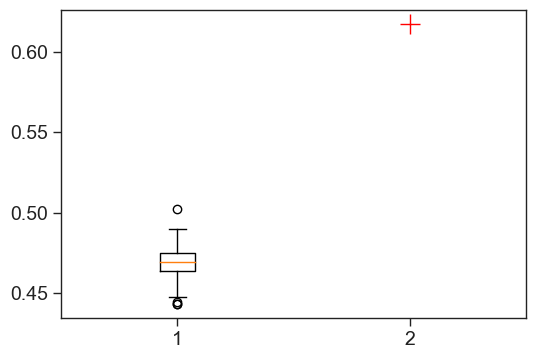

In [39]:
fig = plt.figure(figsize=(6,4))

plt.boxplot(clustering_DP)
plt.plot(2,C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=[1,2])
plt.xlim([0.5,2.5])
plt.show()

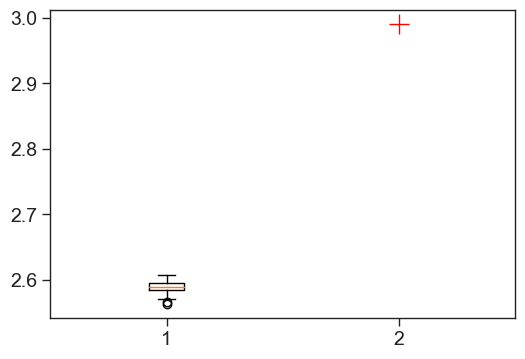

In [40]:
fig = plt.figure(figsize=(6,4))

plt.boxplot(short_path_DP)
plt.plot(2,d,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=[1,2])
plt.xlim([0.5,2.5])
plt.show()

## Now it's your turn

You also have networks for:

- Dolphin social network
- Football network

You can also visit the ICON to try out more networks.

Examine their clustering and shortest path lengths and compare to suitable random networks. Are they higher or lower than expected? What might this mean?